In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [23]:
data = pd.read_parquet("./data/model-data_1.parquet")
# data = pd.read_parquet("./data/model-RLE01_woM1c_WithAccSGMC_1.parquet")
# data = pd.read_parquet("./data/model-RLE01_woM1c_noSGMC_1.parquet")
data.keys()

Index(['OSSPayloads6D', 'OSS00GroundAcc', 'OSSHardpointD', 'OSSM1Lcl',
       'MountEncoders'],
      dtype='object')

In [24]:
acc = np.vstack(data["OSS00GroundAcc"])
mnt_enc = np.vstack(data["MountEncoders"])
HP_axialD = np.vstack(data["OSSHardpointD"])
payload_D = np.vstack(data["OSSPayloads6D"])
m1_rbm = np.vstack(data["OSSM1Lcl"])
(N, ny) = payload_D.shape

In [25]:
tk = 0.001*np.linspace(0, N-1, num=N)
tk[:4]

array([0.   , 0.001, 0.002, 0.003])

Text(0.5, 1.0, 'RLE Acc (m/s^2)')

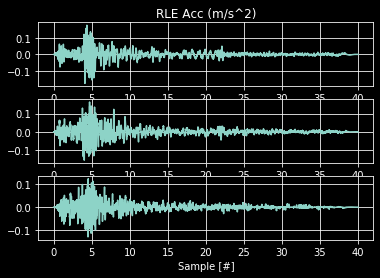

In [26]:
fig,ax = plt.subplots(3,1)
for i in range(3):
    ax[i].plot(tk, acc[:,i])
    ax[i].grid()    
    ax[i].set_xlabel("Sample [#]")
ax[0].set_title("RLE Acc (m/s^2)")

Text(0.5, 0, 'Sample [#]')

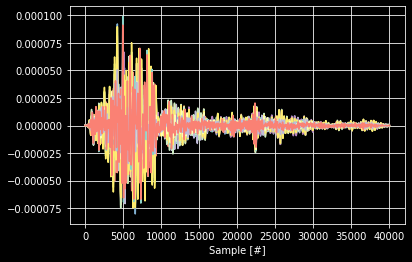

In [27]:
fig,ax = plt.subplots()
ax.plot(mnt_enc [:,:])
ax.grid()
ax.set_xlabel("Sample [#]")
# ax.legend(("T_x","T_y","T_z"))

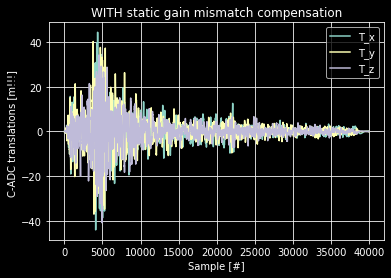

In [28]:
fig,ax = plt.subplots()
ax.plot(payload_D[:,12:15])
ax.grid()
ax.set_ylabel("C-ADC translations [m!!!] ")
ax.set_title("WITH static gain mismatch compensation")
ax.set_xlabel("Sample [#]")
ax.legend(("T_x","T_y","T_z"))

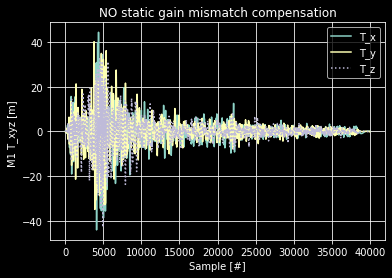

In [29]:
fig,ax = plt.subplots()
ax.plot(m1_rbm[:,0:2])
ax.plot(m1_rbm[:,2],':')
ax.grid()
ax.set_ylabel("M1 T_xyz [m] ")
# ax.set_title("WITH static gain mismatch compensation")
ax.set_title("NO static gain mismatch compensation")
ax.set_xlabel("Sample [#]")
ax.legend(("T_x","T_y","T_z"))

Text(0.5, 0, 'Sample [#]')

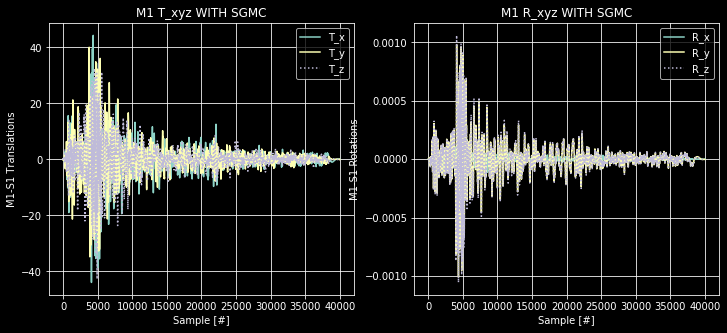

In [30]:
fig,ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].plot(m1_rbm[:,0:2])
ax[0].plot(m1_rbm[:,2],':')
ax[0].set_title("M1 T_xyz WITH SGMC")
ax[0].grid()
ax[0].legend(("T_x","T_y","T_z"))
ax[0].set_ylabel("M1-S1 Translations")
ax[0].set_xlabel("Sample [#]")

ax[1].plot(m1_rbm[:,3:5])
ax[1].plot(m1_rbm[:,5],':')
ax[1].set_title("M1 R_xyz WITH SGMC")
ax[1].grid()
ax[1].legend(("R_x","R_y","R_z"))
ax[1].set_ylabel("M1-S1 Rotations")
ax[1].set_xlabel("Sample [#]")